# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Getting Training Data

In [2]:
x = pd.read_csv('Training Data/Train.csv')
x.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [3]:
xval = x.loc[ : , ['feature_1', 'feature_2', 'feature_3' , 'feature_4' , 'feature_5' ]]
xval.head()

xTrain = xval.values
xTrain
xTrain.shape

(1600, 5)

In [4]:
y = x.loc[: , 'target']
yTrain = y.values.reshape(-1,)
yTrain.shape

(1600,)

# Plotting Training Data

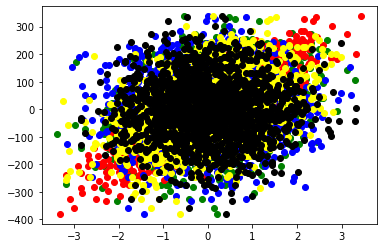

In [5]:
plt.scatter(xTrain[:,0],yTrain,color='green')
plt.scatter(xTrain[:,1],yTrain,color='red')
plt.scatter(xTrain[:,2],yTrain,color='blue')
plt.scatter(xTrain[:,3],yTrain,color='yellow')
plt.scatter(xTrain[:,4],yTrain,color='black')
plt.show()

# Writting The Alogorithm For Testing

In [6]:
# Hypothesis function y = c + m1x1 + m2x2 +m3x3 +m4x4 +m5x5

def hypothesis(x, theta):
    return (theta[0] + theta[1]*x[0] + theta[2]*x[1] + theta[3]*x[2] + theta[4]*x[3] + theta[5]*x[4]) 

In [7]:
# Error Function

def error(x,y, theta):
    err = 0.0
    for i in range(x.shape[0]):
        hx = hypothesis(x[i], theta)
        err += (hx - y[i])**2
    return err

In [8]:
# Gradient Function

def gradient(x,y,theta):
    grad = np.zeros((6,))
    for i in range(x.shape[0]):
        hx = hypothesis(x[i], theta)
        grad[0] += (hx-y[i])
        grad[1] += ((hx-y[i])*x[i][0] )
        grad[2] += ((hx-y[i])*x[i][1] )
        grad[3] += ((hx-y[i])*x[i][2] )
        grad[4] += ((hx-y[i])*x[i][3] )
        grad[5] += ((hx-y[i])*x[i][4] )
        
    return grad
        

In [9]:


def gradient_descent(x,y,learning_rate=0.00005):
    theta = np.array([0.0,1.0,1.0,1.0,1.0,1.0])
    max_itr = 1000
    itr = 0
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(x,y,theta)
        err = error(x,y, theta)
        error_list.append(err)
        theta_list.append([theta[0],theta[1],theta[2],theta[3],theta[4],theta[5]])
        theta[0] -= learning_rate*grad[0]
        theta[1] -= learning_rate*grad[1]
        theta[2] -= learning_rate*grad[2]
        theta[3] -= learning_rate*grad[3]
        theta[4] -= learning_rate*grad[4]
        theta[5] -= learning_rate*grad[5]
        
        itr += 1
       
        
    return theta,error_list,theta_list
        
        
        

In [10]:
final_theta,error_list,theta_list = gradient_descent(xTrain,yTrain)

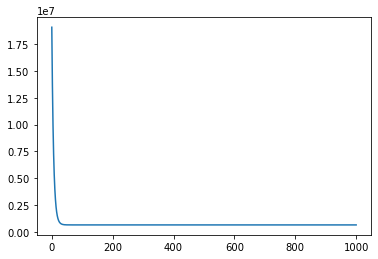

In [11]:
plt.plot(error_list)
plt.show()

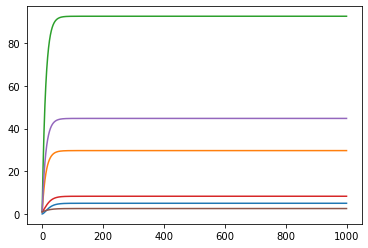

In [12]:
plt.plot(theta_list)
plt.show()

In [13]:
# y = c + m1x1 + m2x2 +m3x3 +m4x4 +m5x5
final_theta

array([ 4.99096674, 29.68187118, 92.66247759,  8.28062089, 44.76773522,
        2.51916121])

# Testing the Model

In [14]:
testDf = pd.read_csv('Testing Data/Test.csv')
testDf.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [21]:
# Converting into Numpy Array

xTest = testDf.values
xTest.shape

(400, 5)

In [42]:
# Prediction for row 200

predict = hypothesis(xTest[200],final_theta)
predict

-96.84780303115623

In [26]:
# Prediction of all Rows

yTest = np.array(testDf)
yTestVal = []
for i in range(yTest.shape[0]):
    finalY = hypothesis(yTest[i],final_theta)
    yTestVal.append(finalY)
yTestVal = np.array(yTestVal)

# Plotting of Final Predicted Values

In [36]:
# yTestVal
# Prediction For first to Features of Testing Data

first = xTest[:,0]
first.shape
second = xTest[:,1]

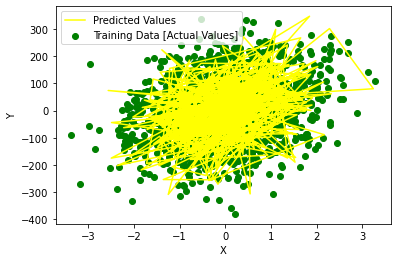

In [43]:
# Plot for first feature of predicted value

plt.scatter(xTrain[:,0],yTrain,label='Training Data [Actual Values]',color='green')
plt.plot(first,yTestVal,color='yellow', label='Predicted Values')

# Plot for second feature of predicted value
# plt.scatter(xTrain[:,1],yTrain,label='Training Data [Actual Values]',color='green')
# plt.plot(second,yTestVal,color='yellow', label='Predicted Values')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [40]:
# Predicting Random value of my model

newTestval = hypothesis(yTest[350],final_theta)
newTestval

12.268165679294144